# Wrangle and Analyze Data

## Jin Lim, Udacity Data Analyst Nanodegree

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime

## Gather

In [2]:
# Read CSV file from 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

# Download TSV file programmatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV as a dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
# Query Twitter API for each tweet's JSON data, then save said data

# First, we set up variables for personal API keys
consumer_key = 'NaN'
consumer_secret = 'NaN'
access_token = 'NaN'
access_secret = 'NaN'

# Set up variables for Tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# We write each tweet to a new line in 'tweet_json.txt'
with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for twt_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(twt_id, tweet_mode = 'extended')
            file.write(json.dumps(tweet._json) + '\n')
        except:
            print('N/A')

N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
N/A
Rate limit reached. Sleeping for: 650
Rate limit reached. Sleeping for: 648


In [3]:
# Read JSON data. Extract tweet id, favorites, and retweets into dataframe
twt_id = []
faves = []
rts = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            twt_id.append(tweet_data['id'])
            faves.append(tweet_data['favorite_count'])
            rts.append(tweet_data['retweet_count'])
            
info = pd.DataFrame({'tweet_id':twt_id, 'favorite_count':faves, 'retweet_count':rts})

## Assess

In [4]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
tweet_archive.head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Look for null or duplicated values
print(tweet_archive[tweet_archive.tweet_id.isnull()])
print(tweet_archive[tweet_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [8]:
print(tweet_archive[tweet_archive.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [9]:
print(tweet_archive.name.value_counts())

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Toby           7
Bailey         7
an             7
Daisy          7
Scout          6
Bella          6
Leo            6
Stanley        6
Jack           6
Rusty          6
Oscar          6
Dave           6
Jax            6
Milo           6
Koda           6
Bentley        5
            ... 
Dixie          1
Fido           1
Lupe           1
Amy            1
Samsom         1
Juckson        1
Keet           1
Zuzu           1
Sage           1
Olaf           1
Brownie        1
Sora           1
Tango          1
Jareld         1
Taco           1
Kirk           1
Carbon         1
Sephie         1
Brandi         1
Pupcasso       1
Arlo           1
Rolf           1
Walker         1
Anna           1
Heinrich       1
Travis         1
Sweet          1
space         

In [10]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
favorite_count    2347 non-null int64
retweet_count     2347 non-null int64
tweet_id          2347 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [13]:
info.describe()

,favorite_count,retweet_count,tweet_id
count,2347.000000,2347.00000,2.347000e+03
mean,8117.396677,3065.04559,7.423783e+17
std,12203.278387,5090.01750,6.836841e+16
min,0.000000,0.00000,6.660209e+17
25%,1409.000000,611.50000,6.783846e+17
50%,3568.000000,1434.00000,7.189719e+17
75%,10053.000000,3575.00000,7.987038e+17
max,144132.000000,78215.00000,8.924206e+17


### Data Tidiness Issues
1. Doggo, floofer, pupper, puppo should be combined into one column
2. All three dataframes (info, tweet_archive, images) should be combined

### Data Quality Issues
1. Remove retweets, as these are not original ratings
2. Remove missing images and breed predictions
3. Tweet_archive has the erroneous datatypes for the following columns: tweet_id (int -> str), timestamp (-> datetime)
4. Several names are not actually names, such as "A, An"
5. Several tweets have been deleted (missing API data indicated by N/A during Tweepy query)
6. Several columns have values of "None", could be changed to NaN
7. Several other variables, such as numerators and denominators, also have invalid datatypes
8. Rating numerator and denominator columns sometimes have incorrect values 

## Clean

In [14]:
# Create copies for cleaning
tweet_archive_clean = tweet_archive.copy()
info_clean = info.copy()
images_clean = images.copy()

### Define
Tidiness 1: Combine doggo, floofer, pupper, and puppo columns

### Code

In [15]:
# Let's create a new "dog_type" variable for the four columns
tweet_archive_clean['dog_type'] = tweet_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [16]:
# Drop unused columns
types = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean = tweet_archive_clean.drop(types, axis=1)

### Test

In [17]:
tweet_archive_clean.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Define 

Tidiness 2: Merge the dataframes

### Code

In [18]:
# Merge tweet_archive and info
tweet_archive_clean = pd.merge(tweet_archive_clean, info, on = 'tweet_id', how = 'inner')

In [19]:
# Now merge both with images
tweet_archive_clean = pd.merge(tweet_archive_clean, images, on = 'tweet_id', how = 'inner')

### Test

In [20]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 27 columns):
tweet_id                      2070 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2070 non-null object
source                        2070 non-null object
text                          2070 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2070 non-null object
rating_numerator              2070 non-null int64
rating_denominator            2070 non-null int64
name                          2070 non-null object
dog_type                      338 non-null object
favorite_count                2070 non-null int64
retweet_count                 2070 non-null int64
jpg_url                       2070 non-null object
img_num                       2070 non

### Define
Quality 1: Remove retweets

### Code

In [21]:
# Simply save the data where 'retweeted_status_id' is null
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]

### Test

In [22]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2069
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
dog_type                      326 non-null object
favorite_count                1994 non-null int64
retweet_count                 1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-nu

### Define
Quality 1a: Remove unused columns

### Code

In [23]:
rt = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweet_archive_clean = tweet_archive_clean.drop(rt, axis=1)

### Test

In [24]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2069
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_type                 326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

### Define
Quality 2: Remove missing images (expanded_urls) and dog breed predictions (jpg_url)

### Code

In [25]:
tweet_archive_clean = tweet_archive_clean.dropna(subset=['expanded_urls'])
tweet_archive_clean = tweet_archive_clean.dropna(subset=['jpg_url'])

### Test

In [26]:
sum(tweet_archive_clean['expanded_urls'].isnull())

0

In [27]:
sum(tweet_archive_clean['jpg_url'].isnull())

0

### Define
Quality 3: Correct erroneous datatypes

### Code

In [28]:
# tweet_id (int -> str)
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype('str')

# timestamp (-> str)
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

### Test

In [29]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2069
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_type                 326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf             

### Define
Quality 4: Fix erroneous dog names
- This is a little more difficult. From visually assessing the data, we notice a few things. "A, An" tend to be another animal or thing other than a dog. For those that are dogs, they are a breed followed by "named" or "name is" in the text.
- The above follows for other lowercase names such as "getting", "his", "the"
- "None" sometimes has names in the text but they are often too difficult to catch programmatically (Vine will be..., Atlas was...). Still could be good to follow the lowercase "named" and "name is" to be thorough. 

### Code

In [30]:
# First, save the lowercase "names" locations where the text contains "named" or "name is"
lower = tweet_archive_clean.loc[(tweet_archive_clean['name'].str.islower()) & (tweet_archive_clean['text'].str.contains('named' or 'name is'))]
# Then, do the same for where the names=="None"
none = tweet_archive_clean.loc[(tweet_archive_clean['name']=='None') & (tweet_archive_clean['text'].str.contains('named' or 'name is'))]
# Finally, save the locations of lowercase "names" we will later switch to "None"
lowernone = tweet_archive_clean.loc[(tweet_archive_clean['name'].str.islower())]

# Save each to a list
lower_list = lower['text'].tolist()
none_list = none['text'].tolist()
lowernone_list = lowernone['text'].tolist()

# Find each name in the text and replace the lowercase "name" with the correct name
for entry in lower_list:
    mask = tweet_archive_clean.text == entry
    name_column = 'name'
    tweet_archive_clean.loc[mask, name_column] = re.findall(r"(?:named\s|name\sis\s)(\w+)", entry)
    
# Find each name in the text and replace "None" with the correct name
for entry in none_list:
    mask = tweet_archive_clean.text == entry
    name_column = 'name'
    tweet_archive_clean.loc[mask, name_column] = re.findall(r"(?:named\s|name\sis\s)(\w+)", entry)
    
# Finally, replace all lowercase "names" with "None"
for entry in lowernone_list:
    mask = tweet_archive_clean.text == entry
    name_column = 'name'
    tweet_archive_clean.loc[mask, name_column] = "None"

### Test

In [31]:
tweet_archive_clean.name.value_counts()

None        641
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Koda          6
Bo            6
Jax           6
Bella         6
Stanley       6
Scout         5
Dave          5
Rusty         5
Buddy         5
Chester       5
Oscar         5
Milo          5
Bailey        5
Louis         5
Leo           5
Clark         4
Maggie        4
Reggie        4
           ... 
Vixen         1
Tom           1
Freddery      1
Dug           1
Ozzy          1
Chelsea       1
Pipsy         1
Betty         1
Zuzu          1
Brownie       1
Rilo          1
Evy           1
Dotsy         1
Hamrick       1
Canela        1
Mitch         1
Gustav        1
Laela         1
Olaf          1
Sage          1
Kaia          1
Sora          1
Tango         1
Jareld        1
Taco          1
Jamesy        1
Kirk          1
Carbon        1
Norman        1
Richie        1
Name: name, Length: 916,

### Define
Quality 5: Missing API data is already addressed by dropping all missing expanded_urls and jpg_url in "Quality 2". There are no breed predictions without images. 

Quality 6: Change names "None" to NaN

### Code

In [32]:
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace('None', np.NaN)

### Test

In [33]:
tweet_archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21           NaN
22        Canela
23           NaN
24           NaN
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2040         NaN
2041         NaN
2042         NaN
2043         NaN
2044         NaN
2045         NaN
2046         NaN
2047         NaN
2048         NaN
2049         NaN
2050         NaN
2051         NaN
2052         NaN
2053         NaN
2054         NaN
2055         NaN
2056         NaN
2057         NaN
2058         NaN
2059         NaN
2060         NaN
2061         NaN
2062         NaN
2063         NaN
2064         NaN
2065         NaN
2066         NaN
2067         N

### Define
Quality 7: Change invalid datatypes. Our created variable "dog_type" should be a categorical variable as stages of dog growth. p1, p2, p3 should also be categorical as breed predictions. The numerators and denominators for ratings should be floats. 

### Code

In [34]:
# Change to categorical variables
tweet_archive_clean.dog_type = tweet_archive_clean.dog_type.astype('category')
tweet_archive_clean.p1 = tweet_archive_clean.p1.astype('category')
tweet_archive_clean.p2 = tweet_archive_clean.p2.astype('category')
tweet_archive_clean.p3 = tweet_archive_clean.p3.astype('category')

# Change to floats
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)
tweet_archive_clean.rating_denominator = tweet_archive_clean.rating_denominator.astype(float)

### Test

In [35]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2069
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1353 non-null object
dog_type                 326 non-null category
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null category
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null category
p2_conf   

### Define
Quality 8: Fix incorrect numerator/denominators for ratings. Several numerators have decimals, and only the second numeral is returned in the rating. 

### Code

In [36]:
# Show all tweets with decimals in the text
tweet_archive_clean[tweet_archive_clean.text.str.contains(r"\d+\.\d*\/\d+")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
554,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
610,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1448,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [37]:
# Manually fix the entries. First, let's expand the text column so that we can read the actual rating. 
pd.set_option('display.max_colwidth', -1)

# Temporarily convert tweet_id to int
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype(int)

# Now fix the entries by matching the tweet_id
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
tweet_archive_clean.loc[tweet_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

### Test

In [38]:
tweet_archive_clean[tweet_archive_clean.text.str.contains(r"\d+\.\d*\/\d+")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
554,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
610,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1448,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


### Define
Quality 8a: Return tweet_id to str. Convert reply_id to str.

### Code

In [39]:
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype(str)
tweet_archive_clean.in_reply_to_status_id = tweet_archive_clean.in_reply_to_status_id.astype(str)
tweet_archive_clean.in_reply_to_user_id = tweet_archive_clean.in_reply_to_user_id.astype(str)

### Test

In [40]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2069
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1353 non-null object
dog_type                 326 non-null category
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null category
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null category
p2_conf 

## Store

In [41]:
tweet_archive_clean.to_csv('twitter_archive_master.csv')

## Analysis

In [42]:
# Make a copy to work off
df = tweet_archive_clean.copy()

# Set index to timestamps so that dates display correctly
df.set_index('timestamp', inplace=True)

# Have a summary
df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,12.237101,10.532096,8911.892678,2749.108325,1.203109,0.593941,1.344195e-01,6.024848e-02
std,41.471197,7.320710,12634.336616,4739.609935,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,2.000000,80.000000,14.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1949.250000,615.500000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,10.000000,4078.500000,1334.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10.000000,11224.500000,3160.500000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,1776.000000,170.000000,144132.000000,78215.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


There is heavy skew for favorites and retweets, which have much higher means than their medians. There must be a snowball effect where favorites and retweets beget more of each until a tweet "goes viral". 

### Retweets and Favorites

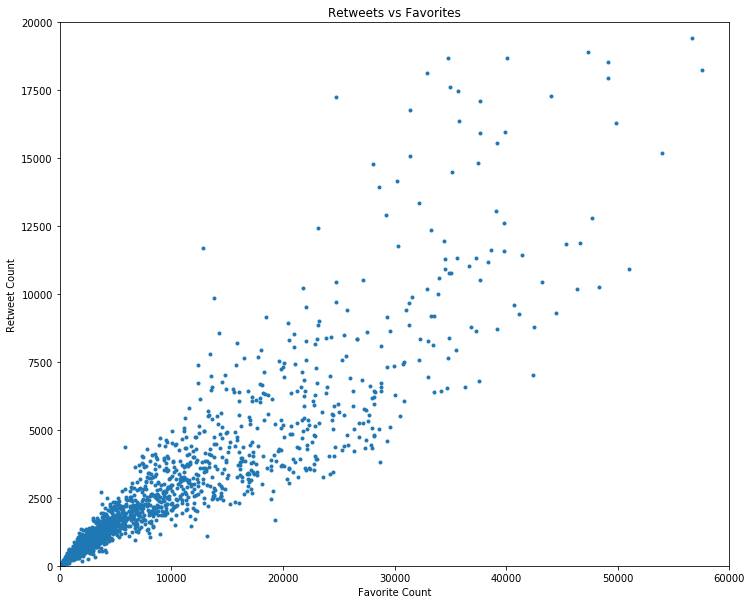

0.91702597807584141

In [102]:
# Make a correlative plot between retweets and favorites
plt.figure(1, figsize = (12, 10))
plt.plot(df.favorite_count, df.retweet_count, marker='o', linestyle='', ms=3)
plt.title('Retweets vs Favorites')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.xlim(0,60000)
plt.ylim(0,20000)
plt.show()
np.corrcoef(df.retweet_count, df.favorite_count)[0][1]

As can be seen, retweets and favorites are highly-correlated. One begets the other. 

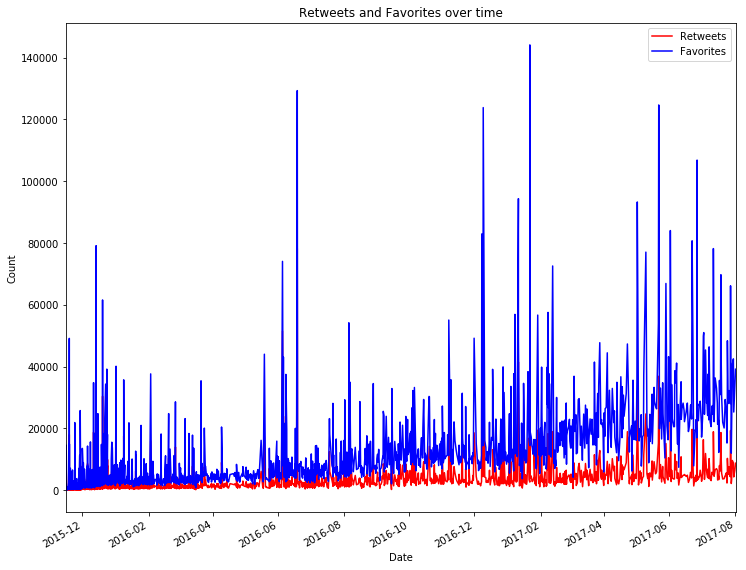

In [44]:
# Now let's see both counts over time 
plt.figure(1, figsize = (12, 10))
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Retweets and Favorites over time')
plt.show()

Retweets are used much less frequently than favorites. There seems to be an upward trend in popularity of the WeRateDogs twitter account over time. 

### Ratings over Dog Type

In [47]:
df.groupby('dog_type')['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,72.0,14.305556,22.729666,5.0,11.0,12.0,13.0,204.0
floofer,3.0,12.666667,0.577350,12.0,12.5,13.0,13.0,13.0
pupper,223.0,12.929417,15.051251,3.0,10.0,11.0,12.0,143.0
puppo,28.0,12.142857,1.208436,9.0,12.0,12.5,13.0,14.0


Not every dog has a dog_type (in fact, precious few do), but for the ones that do, it would seem "doggos" are rated the highest by a significant margin. Even when assessing the data visually, this is significant because the next eight or so highest ratings (that have a dog type) are all "puppers" (despite doggo having the highest max). This must mean that doggos are consistently rated higher. 

### Ratings and Favorites

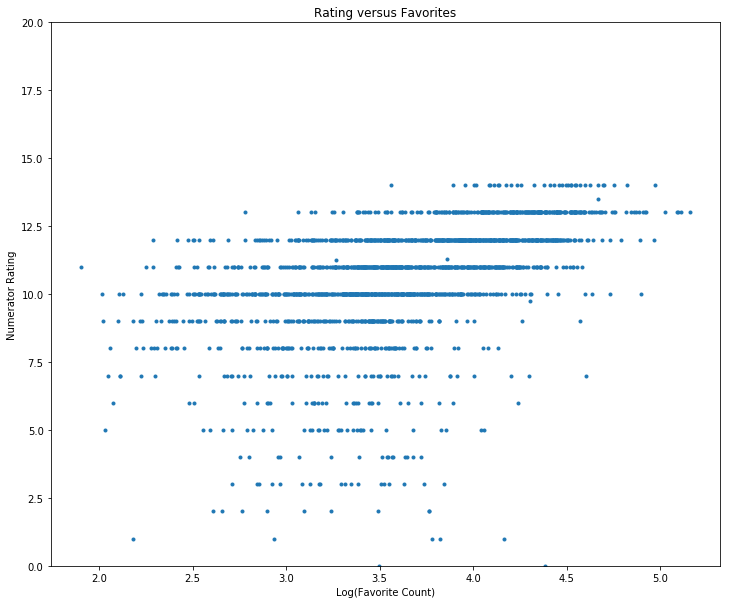

In [53]:
# Create a log of favorite_count for easier visualization
log = ['favorite_count']
df_log = df[log].applymap(lambda x: np.log10(x))

plt.figure(1, figsize = (12, 10))
plt.plot(df_log.favorite_count, df.rating_numerator, marker ='o', linestyle='', ms= 3)
plt.title('Rating versus Favorites')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,20)
plt.show()